In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
drug_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combine_df =pd.merge(mouse_data, drug_data, on="Mouse ID")

# Display the data table for preview

combine_df.head()
#drug_data
#mouse_data



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

#tumor = combine_df.loc[combine_df["Drug"] == "Stelasyn"]
#print(tumor)
#tumor_data = tumor_data.groupby(["Drug"]).mean()
#tumor_data = tumor.groupby(["Timepoint"]).mean()
#tumorVOL_df = pd.DataFrame(tumor_data)


tumor_data = combine_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumorVOL_df = pd.DataFrame(tumor_data)
tumorVOL_df = tumorVOL_df.reset_index()
mean_pivot = tumorVOL_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#print(tumor_data)

#tumorVOL_df


#plt.scatter(tumorVOL_df["Timepoint"], tumorVOL_df["Tumor Volume (mm3)"])
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume")
#plt.title("Tumor Response of Naftisol")
#plt.show()

uniques = tumorVOL_df["Drug"].unique()
print(uniques)
tumorVOL_df

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


[40.48508402745415, 53.7524335445471, 54.963549459264, 56.80690648909384, 55.89102364545802, 56.01220866112267, 54.91193400153871, 39.986931118829524, 55.98163558232932, 54.66045102256135]
[0.9709032345000091, 2.0477566291416047, 2.2059693464844665, 2.6717278012693644, 2.6166913913052583, 2.479069389766859, 2.220041941321588, 1.0310307963891479, 2.4891561307817645, 2.2173282570545467]


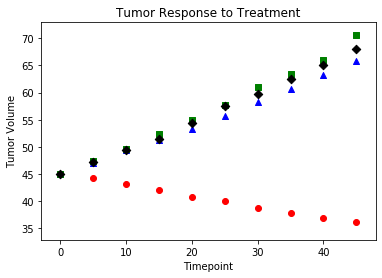

In [3]:
colors = ["red", "yellow", "blue", "green", "orange", "black", "cyan", "purple", "grey", "brown"]
alpha_list = ["1", "0", "1", "1", "0", "1", "0", "0", "0", "0"]
alphaInt_list = [.5, 0, .5, .5, 0, .5, 0, 0, 0, 0]
marker_list = ["o",".","^","s",".","D",".",".",".","."]
dfList = []
count = 0

vol_meansList = []
vol_semsList = []




for drug in uniques:
    newDf = tumorVOL_df.loc[tumorVOL_df["Drug"]==drug]
    dfList.append(newDf)

for df in dfList:
    mean = df["Tumor Volume (mm3)"].mean()
    error = df["Tumor Volume (mm3)"].sem()
    vol_meansList.append(mean)
    vol_semsList.append(error)
    
#print(dfList)
print(vol_meansList)
print(vol_semsList)
                          

#x_axis = np.arange(0, len(dfList), 1) + 1
#fig, ax = plt.subplots()
#ax.errorbar(x_axis, vol_meansList, vol_semsList, fmt="o")
#ax.set_xlabel("Timepoint")
#ax.set_ylabel("Tumor volume (mm3)")

    
for df in dfList:
    plt.scatter(dfList[count]["Timepoint"], dfList[count]["Tumor Volume (mm3)"], marker=marker_list[count], color=colors[count], alpha=alpha_list[count])
    count +=1
    
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Response to Treatment")


plt.show()


#capDF = tumorVOL_df.loc[tumorVOL_df["Drug"]=="Capomulin"]
#print(capDF)
#plt.scatter(DFList[0:]["Timepoint"], capDF["Tumor Volume (mm3)"], color=colors[0:])
#plt.scatter(DFList[1]["Timepoint"], capDF["Tumor Volume (mm3)"], color=colors[1])

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorError = combine_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumorError_df = pd.DataFrame(tumorError)
#tumorError_df = tumorError_df.rename(columns= {'Tumor Volume (mm3)':'Standard Error (Tumor Volume)'})

# Preview DataFrame

print(tumorError_df.columns)
tumorError_df.reset_index()

Index(['Tumor Volume (mm3)'], dtype='object')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [5]:
errorDF = tumorError_df.reset_index()
errorDF = errorDF.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
errorDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


1
0
1
1
0
1
0
0
0
0


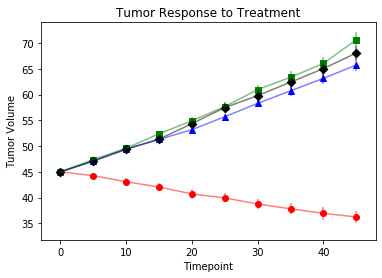

In [6]:
# Minor Data Munging to Re-Format the Data Frames

mean_pivot = tumorVOL_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#plt.errorbar(errorDF.index, mean_pivot["Capomulin"], yerr=errorDF["Capomulin"])

count = 0

for df in dfList:
    plt.scatter(dfList[count]["Timepoint"], dfList[count]["Tumor Volume (mm3)"], marker=marker_list[count], color=colors[count], 
                alpha=alpha_list[count])
    plt.errorbar(errorDF.index, mean_pivot[uniques[count]], yerr=errorDF[uniques[count]], color=colors[count], alpha=alphaInt_list[count])
    print(alpha_list[count])
    count +=1
    
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Response to Treatment")


plt.show()
# Preview that Reformatting worked


In [7]:
# Generate the Plot (with Error Bars)
#semList = []
#countSEM = 0
#for drug in uniques:
    #new_semDf = errorDF.loc[errorDF["Drug"]==drug]
    #semList.append(new_semDf)

#print(semList[1])
#print(len(semList)

#for df in dfList:
   #plt.scatter(semList[countSEM]["Timepoint"], semList[countSEM]["Tumor Volume (mm3)"], color=colors[countSEM], 
                #alpha=alpha_list[countSEM])
    #countSEM +=1

#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume")
#plt.title("Tumor Volume Over Time")
#plt.show()

In [8]:
# Show the Figure
plt.show()

In [9]:
combine_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
metastatic_data = combine_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_dataDF = pd.DataFrame(metastatic_data)
metastatic_dataDF = metastatic_dataDF.reset_index()
metastatic_dataDF = metastatic_dataDF.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview DataFrame
metastatic_dataDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastaticError = combine_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
metastaticError_df = pd.DataFrame(metastaticError)
# Preview DataFrame
metastaticError_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [12]:
# Minor Data Munging to Re-Format the Data Frames
metastaticError_df = metastaticError_df.reset_index()
metastaticError_df = metastaticError_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
metastaticError_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [16]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [18]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)